In [33]:
import collections
import numpy as np


def mackey_glass(sample_len=1000, tau=17, seed=None, n_samples = 1):
    '''
    mackey_glass(sample_len=1000, tau=17, seed = None, n_samples = 1) -> input
    Generate the Mackey Glass time-series. Parameters are:
        - sample_len: length of the time-series in timesteps. Default is 1000.
        - tau: delay of the MG - system. Commonly used values are tau=17 (mild 
          chaos) and tau=30 (moderate chaos). Default is 17.
        - seed: to seed the random generator, can be used to generate the same
          timeseries at each invocation.
        - n_samples : number of samples to generate
    '''
    delta_t = 10
    history_len = tau * delta_t 
    # Initial conditions for the history of the system
    timeseries = 1.2
    
    if seed is not None:
        np.random.seed(seed)

    samples = []

    for _ in range(n_samples):
        history = collections.deque(1.2 * np.ones(history_len) + 0.2 * \
                                    (np.random.rand(history_len) - 0.5))
        # Preallocate the array for the time-series
        inp = np.zeros((sample_len,1))
        
        for timestep in range(sample_len):
            for _ in range(delta_t):
                xtau = history.popleft()
                history.append(timeseries)
                timeseries = history[-1] + (0.2 * xtau / (1.0 + xtau ** 10) - \
                             0.1 * history[-1]) / delta_t
            inp[timestep] = timeseries
        
        # Squash timeseries through tanh
        inp = np.tanh(inp - 1)
        samples.append(inp)
    return samples


def mso(sample_len=1000, n_samples = 1):
    '''
    mso(sample_len=1000, n_samples = 1) -> input
    Generate the Multiple Sinewave Oscillator time-series, a sum of two sines
    with incommensurable periods. Parameters are:
        - sample_len: length of the time-series in timesteps
        - n_samples: number of samples to generate
    '''
    signals = []
    for _ in range(n_samples):
        phase = np.random.rand()
        x = np.atleast_2d(np.arange(sample_len)).T
        signals.append(np.sin(0.2 * x + phase) + np.sin(0.311 * x + phase))
    return signals


def lorentz(sample_len=1000, sigma=10, rho=28, beta=8 / 3, step=0.01):
    """This function generates a Lorentz time series of length sample_len,
    with standard parameters sigma, rho and beta. 
    """

    x = np.zeros([sample_len])
    y = np.zeros([sample_len])
    z = np.zeros([sample_len])

    # Initial conditions taken from 'Chaos and Time Series Analysis', J. Sprott
    x[0] = 0;
    y[0] = -0.01;
    z[0] = 9;

    for t in range(sample_len - 1):
        x[t + 1] = x[t] + sigma * (y[t] - x[t]) * step
        y[t + 1] = y[t] + (x[t] * (rho - z[t]) - y[t]) * step
        z[t + 1] = z[t] + (x[t] * y[t] - beta * z[t]) * step

    x.shape += (1,)
    y.shape += (1,)
    z.shape += (1,)

    return np.concatenate((x, y, z), axis=1)

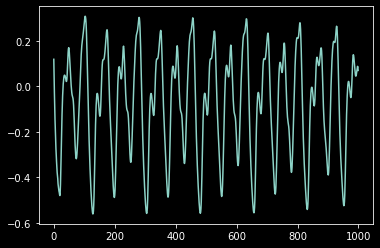

In [40]:
plt.plot(np.ndarray.tolist(mackey_glass(sample_len=1000,n_samples=1,seed=6,tau = 20)[0]))